In [32]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
%matplotlib inline


In [3]:
df = pd.read_csv('energy_dataset_processed.csv')

In [4]:
X = df.drop(['Heating_Load', 'Cooling_Load'], axis = 1)
y = df[['Heating_Load', 'Cooling_Load']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
folds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [7]:
lm = LinearRegression()

In [8]:
scores = cross_val_score(lm, X, y, cv = folds, scoring = 'r2')

print('Mean r2 score: ',scores.mean())
print('Std of r2 score: ',scores.std())

Mean r2 score:  0.8985647813427544
Std of r2 score:  0.017689251097998633


In [9]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
lm_preds = lm.predict(X_test_scaled)

<AxesSubplot:xlabel='Heating_Load'>

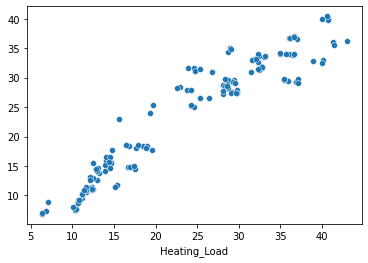

In [22]:
sns.scatterplot(x=y_test['Heating_Load'], y=lm_preds[:,0])

<AxesSubplot:xlabel='Cooling_Load'>

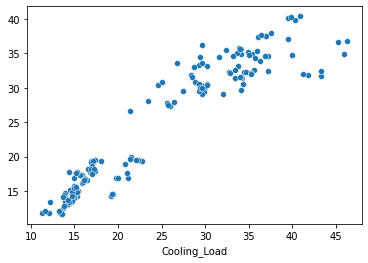

In [24]:
sns.scatterplot(x=y_test['Cooling_Load'], y=lm_preds[:,1])

In [25]:
lm.score(X_train_scaled, y_train)

0.8998132106209598

In [26]:
lm.score(X_test_scaled, y_test)

0.9018743392276657

In [19]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [20]:
rf_preds = rf_model.predict(X_test_scaled)

E:\Anaconda\envs\energy_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heating_Load'>

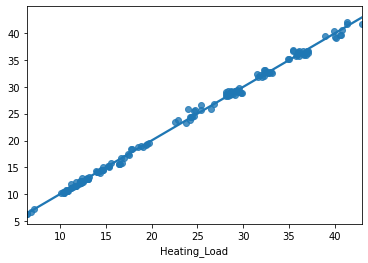

In [21]:
sns.regplot(y_test['Heating_Load'], rf_preds[:,0])

E:\Anaconda\envs\energy_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cooling_Load'>

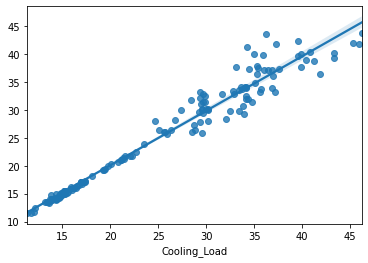

In [22]:
sns.regplot(y_test['Cooling_Load'], rf_preds[:,1])

In [23]:
print(rf_model.score(X_train_scaled, y_train))
print(rf_model.score(X_test_scaled, y_test))

0.9971020794496201
0.9788225922996614
